# Python Practice Final

boiler plate libraries functions and tools for the course are included below

note this template comes from an edited version of Dr. Lignell's Final- His exams were 10 questions 10pts- here excel was the focus of Questions 1-3 and Python was on questions 4-10.

Dr.Wheelers final is likely to reflect the format of previous exams where questions will have you use multiple skills.

Note for Excel key Topics and Skills are:
* VBA skills
* plotting - making a well labeled plot with axes units and appropriate bounds 
* curve fitting - using trendline and Least Squares fit method 
* solver - optimizing parameters, or finding multiple equations with multiple unknowns 
* Newton's method
* basic skills: locking cells, rows, or columns apppropriately to fill down equations, formatting tools, etc

Note for Python key Topics and Skills are:
* markdown and LateX
* arrays
* dictionaries
* looping
* functions
* solvers (fsolve, odeint) when and how to use
* integrating (using quad or sympy)

In [1]:
import numpy             as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.optimize      import fsolve, curve_fit
from scipy.integrate     import odeint, quad
from scipy.interpolate   import interp1d
import matplotlib.cm as cm

## Problem 4
You have a bag of marbles. They are red, blue, and white. Create a dictionary that maps the marble color names to their quantity for the data given. Loop over elements of the dictionary and print the colors and numbers to the screen.

| color   |quantity|
|---------|--------|
| red     | 10     |
| blue    | 15     |
| white   | 8      |


In [2]:
marbles = {
    'red':10,
    'blue':15,
    'white':8,
    }

## Problem 5

Use ```quad``` to compute the value of the following integral:
$$\int_0^1 \frac{1-x^4}{2x^2 + 4}dx$$

In [13]:
Integral = quad(lambda x: (1-x**4)/(2*x**2 + 4), 0, 1)[0]
print("The integral of [(1-x^4)/(2x^2+4) dx] from 0 to 1 is equal to {INT:.4f}".format(INT = Integral))

The integral of [(1-x^4)/(2x^2+4) dx] from 0 to 1 is equal to 0.1805


## Problem 6
Use sympy to compute the numerical value of the following integral:
$$\int_0^1\frac{1-x^4}{2x^2 + 4}dx$$

Here are some functions we discussed for sympy:

```
display, symbols, Function, subs, evalf, simplify, expand
factor, diff, integrate, limit, Derivative, Integral
Limit, doit, solve, dsolve, Matrix, row, row_del, inv
```

In [26]:
X_range = np.linspace(0,1,100001)
ΔX = X_range[1]-X_range[0]
def Summation(x):
    return (1-x**4)/(2*x**2 + 4)
summation = np.sum(Summation(X_range)*ΔX)
print("Repeating with a numeric solution, the result is {SUM:.4f}".format(SUM=summation))

Repeating with a numeric solution, the result is 0.1805


## Problem 7

For the given data find the best parameters E and k for the model:
$$r = ke^{-E/T}$$

Also, plot the data along with the model. Label the axes. Use data markers without lines for the given data, and a line without markers for the model. Include a legend.


In [3]:
T = np.array([500,600,700,800,900,1000,1100,1200], dtype=float)
r = np.array([0.009,0.0122,0.0199,0.0285,0.0344,0.0472,0.0653,0.08125])

## Problem 8

An insulated wire has uniform heat generation causing an unsteady temperature change along its length. The temperature is govered by the following partial differential equation (PDE)
$$\frac{\partial T}{\partial t} = \alpha\frac{\partial^2T}{\partial x^2} + S.$$
Here, $t$ is time, $x$ is spatial distance, $S$ is the heat generation source term, and $\alpha$ is the thermal diffusivity. We can convert this single PDE to a series of ordinary differential equations (ODEs) for the temperature at specified points as follows. First, we write write a grid of $n$ points on the domain:
```
x=0                                    x=L
*---*---*---...---*---*---*---...---*---*
0   1   2   ...  i-1  i  i+1  ...  n-2 n-1
```
The points are uniformly spaced. We specify a constant value of the temperature on the edges: $T_0=T_{n-1}=1$. 

Now, we write a numerical approximation for the second derivative in our PDE at each interior grid point $i$ in terms of neighboring grid points $i-1$ and $i+1$:

$$\frac{\partial^2T}{\partial x^2} = \frac{\partial}{\partial x}\left(\frac{\partial T}{\partial x}\right) \approx \frac{\left(\frac{\partial T}{\partial x}\right)_{i+1/2} - \left(\frac{\partial T}{\partial x}\right)_{i-1/2}}{\Delta x} = \frac{\frac{ T_{i+1}-T_i }{\Delta x} - \frac{ T_{i}-T_{i-1}  }{\Delta x}}{\Delta x}= \frac{T_{i-1}-2T_i+T_{i+1}}{\Delta x^2}.$$

Inserting this into our PDE for interior points $i$, and noting that the edge temperatures are constant gives the following $n$ ODEs:
\begin{align}
&\frac{dT_0}{dt} = 0, \\
&\frac{dT_i}{dt} = \frac{\alpha}{\Delta x^2}(T_{i-1} - 2T_i + T_{i+1}) + S, \,\,\, i=1\ldots n-2, \\
&\frac{dT_{n-1}}{dt} = 0.
\end{align}

**Solve these ODEs for $n=101$ using the following:
\begin{align}
L &= 1,\\
\alpha &= 1,\\
S &= 6,\\
t_{end} &= 1.
\end{align}
Assume the initial temperature at each point is 1.**

On a single plot, plot the temperature profile $T_i$ versus $x_i$ at $t=0,\,0.05,\,0.1,\,1$


## Problem 9-10
The water-gas-shift reaction is very important in chemical engineering:
$$CO + H_2O \rightleftharpoons CO_2 + H_2$$
If we start with initial moles $n_{CO,i}$, $n_{H2O,i}$, $n_{CO2,i}$, $n_{H2,i}$, then the final moles of each species are related to an *extent of reaction variable* $x$:
\begin{align}
n_{CO}&=n_{CO,i}-x, \\
n_{H2O}&=n_{H2O,i}-x, \\
n_{CO2}&=n_{CO2,i}+x, \\
n_{H2}&=n_{H2,i}+x.
\end{align}

At equilibrium, we have:
$$K(x) = \frac{n_{CO2}n_{H2}}{n_{CO}n_{H2O}}= \frac{(n_{CO2,i}+x)(n_{H2,i}+x)}{(n_{CO,i}-x)(n_{H2O,i}-x)}$$
Here, $K$ is the equilibrium constant, and is given by 
$$K = e^{-\Delta G^o(T)/RT},$$
where $\Delta G^o(T)$ is the Gibbs energy of reaction, given by
$$\Delta G^o(T) = g_{CO2}(T)+g_{H2}(T) - g_{CO}(T)-g_{H2O}(T)$$

#### Problem 9

$g$ (J/mol) versus $T$ (K) data are given for each species. Use a cubic spline to evaluate $g$ at T=1234 K for each species.

In [4]:
# naming these Ta for Temperature array, etc.

Ta    = np.array([300, 470, 640, 810, 980, 1150, 1320, 1490, 1660, 1830, 2000], dtype=float)
gCOa  = np.array([-1.69826432e+08, -2.04658243e+08, -2.41355574e+08, -2.79454157e+08,
                 -3.18699800e+08, -3.58924225e+08, -4.00003506e+08, -4.41842454e+08,
                 -4.84364918e+08, -5.27508382e+08, -5.71220539e+08])/1000
gCO2a = np.array([-4.57643851e+08, -4.95641584e+08, -5.36355921e+08, -5.79264731e+08,
                 -6.24022105e+08, -6.70378162e+08, -7.18141398e+08, -7.67160484e+08,
                 -8.17312860e+08, -8.68496938e+08, -9.20627096e+08])/1000
gH2a  = np.array([-3.92042461e+07, -6.26438652e+07, -8.79246975e+07, -1.14544781e+08,
                 -1.42230545e+08, -1.70810242e+08, -2.00166091e+08, -2.30213454e+08,
                 -2.60887154e+08, -2.92135152e+08, -3.23914649e+08])/1000
gH2Oa = np.array([-2.98473226e+08, -3.32000676e+08, -3.67720626e+08, -4.05118508e+08,
                 -4.43910707e+08, -4.83917260e+08, -5.25013096e+08, -5.67102443e+08,
                 -6.10108061e+08, -6.53965486e+08, -6.98619478e+08])/1000

In [5]:
# cubic spline is a kind of interpolation 
# use interp1d, Temperature array, and g_species arrays to produce a function to evaluate at T = 1234 K


#### Problem 10

If we start with one mole of all species, find the equilibrium moles of each species at T=1234 K. $x=0$ is a reasonable guess for $x$. If there are multiple solutions for $x$, the right one will be the one that leads to positive (physically possible) values of $n$ for all the species.

## (Just for fun)

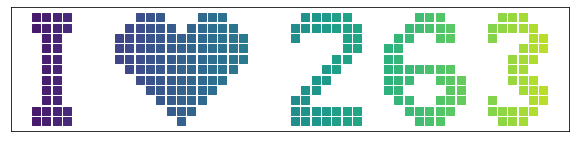

In [6]:
def love263(x,y):
    return  1/2 < (y//17 // 2**(17*x + y%17)) %2

N = 455237967230584141120681068161126439435777949202837932283458057884367902070883924833683695156826001205117559735861964474609436387651618836596391580356781270546947348072023025190767025857644992395215759354159376788456898368638409735853437145274153841787770669959867584800096256

plt.figure(figsize=(10,5))
color_list = cm.viridis(np.linspace(0,1,60))

for x in range(60):
    for y in range(17):
        if love263(x,y+N):
            plt.plot(x,y,'s', ms=8, color=color_list[x])
plt.axis('scaled')
plt.xticks([])
plt.yticks([])
plt.ylim([1,13]);